In [1]:
import pandas as pd 
import numpy as np 
import sklearn as skl 
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time
import warnings
import os
import seaborn as sns # for ploting
from sklearn.metrics import fbeta_score, precision_score, recall_score, confusion_matrix
import itertools

In [2]:
import matplotlib
from matplotlib import pyplot as plt,style
from multiprocessing import Pool

In [3]:
style.use('ggplot')
np.random.seed(42) 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [4]:
warnings.simplefilter("ignore", category=DeprecationWarning)

root_feature = '/Users/abhijit/Desktop/GIT_Projects/intl-iot/model/features-testing1.1/us'
root_model='/Users/abhijit/Desktop/GIT_Projects/intl-iot/models_final/features-testing1.1/us'

root_output=root_model+'/output'
dir_tsne_plots = root_model + '/tsne-plots'

num_pools=12

In [5]:
lfiles = []
lparas= []
ldnames = []
for csv_file in os.listdir(root_feature):
    if csv_file.endswith('.csv'):
        print(csv_file)
        train_data_file = '%s/%s' % (root_feature, csv_file)
        dname = csv_file[:-4]
        lfiles.append(train_data_file)
        ldnames.append(dname)
        lparas.append((train_data_file, dname))
p = Pool(num_pools)

yi-camera.csv


In [6]:
lparas[0][0]

'/Users/abhijit/Desktop/GIT_Projects/intl-iot/model/features-testing1.1/us/yi-camera.csv'

In [7]:
data = pd.read_csv(lparas[0][0])
data.head()

,meanBytes,minBytes,maxBytes,medAbsDev,skewLength,kurtosisLength,q10,q20,q30,q40,...,kurtosisTBP,skewTBP,network_to,network_from,network_both,network_to_external,network_local,anonymous_source_destination,device,state
0,169.031250,46,1214,29.652044,3.036190,8.953171,50.0,54.0,54.0,65.2,...,25.677235,5.212452,50,70,0,8,0,0,yi-camera,power
1,160.101562,46,1214,14.826022,3.273655,9.789039,50.0,54.0,54.0,62.0,...,77.798463,8.288856,56,69,0,3,0,0,yi-camera,power
2,159.250000,46,1214,23.721635,3.230347,10.081830,50.0,54.0,54.0,54.0,...,103.026808,9.924942,52,68,0,8,0,0,yi-camera,power
3,186.226562,46,1214,29.652044,2.870199,7.741643,50.0,54.0,62.0,66.0,...,73.163848,7.890162,60,63,0,5,0,0,yi-camera,power
4,178.250000,46,1214,17.791227,2.982131,8.014788,54.0,54.0,54.0,66.0,...,16.486251,4.049408,53,69,0,6,0,0,yi-camera,power


In [8]:
set(data['state'])

{'android_lan_photo',
 'android_lan_recording',
 'android_lan_watch',
 'android_wan_photo',
 'android_wan_recording',
 'android_wan_watch',
 'local_move',
 'power'}

In [9]:
anomaly_data = pd.read_csv('/Users/abhijit/Desktop/GIT_Projects/intl-iot/model/new-features-testing1.1-all/us/google-home-mini.csv')
anomaly_data.head()

,meanBytes,minBytes,maxBytes,medAbsDev,skewLength,kurtosisLength,q10,q20,q30,q40,...,kurtosisTBP,skewTBP,network_to,network_from,network_both,network_to_external,network_local,anonymous_source_destination,device,state
0,533.482143,46,1484,157.155835,0.781977,-1.303548,66.0,66.0,66.0,98.8,...,55.509713,6.894902,0,0,0,224,0,0,google-home-mini,local_voice
1,570.375000,46,1484,216.459924,0.658865,-1.487235,66.0,66.0,66.0,155.0,...,61.964982,7.308551,0,0,0,224,0,0,google-home-mini,local_voice
2,570.700893,46,1484,216.459924,0.641472,-1.492163,66.0,66.0,66.0,104.0,...,78.237031,8.325250,0,0,0,224,0,0,google-home-mini,local_voice
3,602.928571,46,1484,216.459924,0.543719,-1.601945,66.0,66.0,77.0,155.0,...,91.516524,9.082257,0,0,0,224,0,0,google-home-mini,local_voice
4,554.861607,46,1484,131.951597,0.673235,-1.470555,66.0,66.0,66.0,70.8,...,70.467879,7.286562,0,0,0,224,0,0,google-home-mini,local_voice


In [10]:
set(anomaly_data['state'])

{'local_voice', 'local_volume', 'power'}

In [11]:
anomaly_data = anomaly_data[anomaly_data['state'] == 'local_voice']

In [12]:
len(anomaly_data)

400

In [13]:
%%markdown
## Types of outliers
In general, outliers can be classified into three categories, namely global outliers, contextual (or conditional) outliers, and collective outliers.

Global outlier — Object significantly deviates from the rest of the data set

Contextual outlier — Object deviates significantly based on a selected context. For example, 28⁰C is an outlier for a Moscow winter, but not an outlier in another context, 28⁰C is not an outlier for a Moscow summer.

Collective outlier — A subset of data objects collectively deviate significantly from the whole data set, even if the individual data objects may not be outliers. For example, a large set of transactions of the same stock among a small party in a short period can be considered as an evidence of market manipulation.

## Types of outliers
In general, outliers can be classified into three categories, namely global outliers, contextual (or conditional) outliers, and collective outliers.

Global outlier — Object significantly deviates from the rest of the data set

Contextual outlier — Object deviates significantly based on a selected context. For example, 28⁰C is an outlier for a Moscow winter, but not an outlier in another context, 28⁰C is not an outlier for a Moscow summer.

Collective outlier — A subset of data objects collectively deviate significantly from the whole data set, even if the individual data objects may not be outliers. For example, a large set of transactions of the same stock among a small party in a short period can be considered as an evidence of market manipulation.


In [14]:
data_features = data.drop(['device','state'], axis=1).fillna(-1)
data_std = StandardScaler().fit_transform(data_features)
data_std = pd.DataFrame(data_std, index=data_features.index,columns=data_features.columns)
data_std['state'] = 0

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
anomaly_features = anomaly_data.drop(['device','state'], axis=1).fillna(-1)
anomaly_std = StandardScaler().fit_transform(anomaly_features)
anomaly_std = pd.DataFrame(anomaly_std, index=anomaly_features.index, columns=anomaly_features.columns)
anomaly_std['state'] = 1

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
train, normal_test, _, _ = train_test_split(data_std, data_std, test_size=.2, random_state=42)

normal_valid, normal_test, _, _ = train_test_split(normal_test, normal_test, test_size=.5, random_state=42)
anormal_valid, anormal_test, _, _ = train_test_split(anomaly_std, anomaly_std, test_size=.5, random_state=42)

In [17]:
train = train.reset_index(drop=True)
valid = normal_valid.append(anormal_valid).sample(frac=1).reset_index(drop=True)
test = normal_test.append(anormal_test).sample(frac=1).reset_index(drop=True)

In [18]:
len(train)

1984

In [19]:
print('Train shape: ', train.shape)
print('Proportion os anomaly in training set: %.2f\n' % train['state'].mean())
print('Valid shape: ', valid.shape)
print('Proportion os anomaly in validation set: %.2f\n' % valid['state'].mean())
print('Test shape:, ', test.shape)
print('Proportion os anomaly in test set: %.2f\n' % test['state'].mean())

Train shape:  (1984, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (448, 28)
Proportion os anomaly in validation set: 0.45

Test shape:,  (448, 28)
Proportion os anomaly in test set: 0.45



In [20]:
from scipy.stats import multivariate_normal

mu = train.drop('state', axis=1).mean(axis=0).values
sigma = train.drop('state', axis=1).cov().values
model = multivariate_normal(cov=sigma, mean=mu, allow_singular=True)

print(np.median(model.logpdf(valid[valid['state'] == 0].drop('state', axis=1).values))) 
print(np.median(model.logpdf(valid[valid['state'] == 1].drop('state', axis=1).values)))

1.6875748271171842
-585.7348023808257


In [50]:
tresholds = np.linspace(-100,-10, 150)
scores = []
for treshold in tresholds:
    y_hat = (model.logpdf(valid.drop('state', axis=1).values) < treshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=valid['state'].values),
                 precision_score(y_pred=y_hat, y_true=valid['state'].values),
                 fbeta_score(y_pred=y_hat, y_true=valid['state'].values, beta=2)])

scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())

0.9950248756218906 119


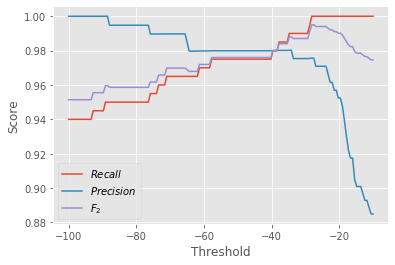

In [51]:
plt.plot(tresholds, scores[:, 0], label='$Recall$')
plt.plot(tresholds, scores[:, 1], label='$Precision$')
plt.plot(tresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
# plt.xticks(np.logspace(-10, -200, 3))
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

Final threshold: -28
Test Recall Score: 0.995
Test Precision Score: 0.966
Test F2 Score: 0.989


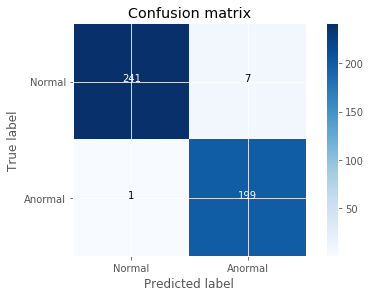

In [52]:
final_tresh = tresholds[scores[:, 2].argmax()]
y_hat_test = (model.logpdf(test.drop('state', axis=1).values) < final_tresh).astype(int)

print('Final threshold: %d' % final_tresh)
print('Test Recall Score: %.3f' % recall_score(y_pred=y_hat_test, y_true=test['state'].values))
print('Test Precision Score: %.3f' % precision_score(y_pred=y_hat_test, y_true=test['state'].values))
print('Test F2 Score: %.3f' % fbeta_score(y_pred=y_hat_test, y_true=test['state'].values, beta=2))

cnf_matrix = confusion_matrix(test['state'].values, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=['Normal','Anormal']
                      , title='Confusion matrix')

In [32]:
combined_data = data_std.append(anomaly_std)

In [36]:
columns_data = combined_data.columns
columns_data = columns_data.drop('state')

Index(['meanBytes', 'minBytes', 'maxBytes', 'medAbsDev', 'skewLength',
       'kurtosisLength', 'q10', 'q20', 'q30', 'q40', 'q50', 'q60', 'q70',
       'q80', 'q90', 'spanOfGroup', 'meanTBP', 'varTBP', 'medianTBP',
       'kurtosisTBP', 'skewTBP', 'network_to', 'network_from', 'network_both',
       'network_to_external', 'network_local', 'anonymous_source_destination'],
      dtype='object')

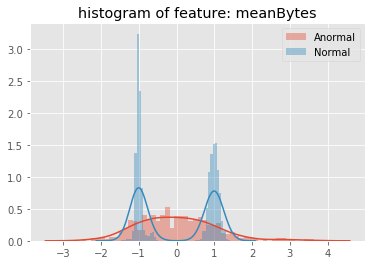

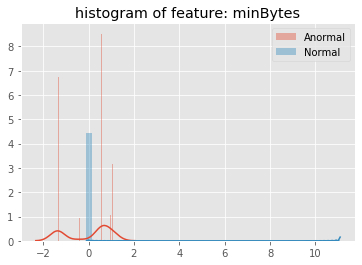

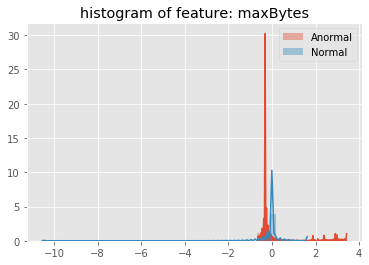

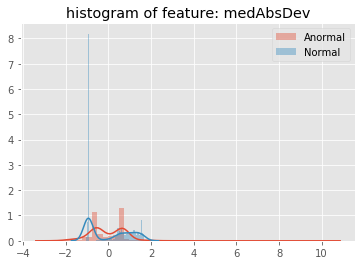

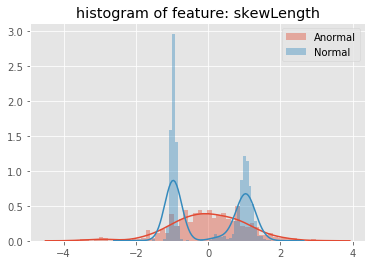

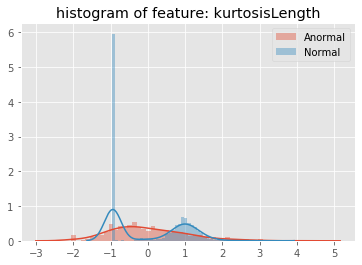

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


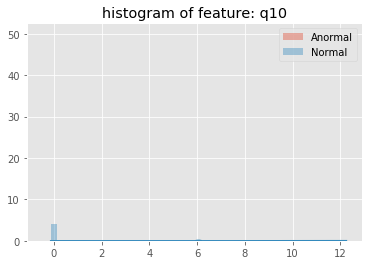

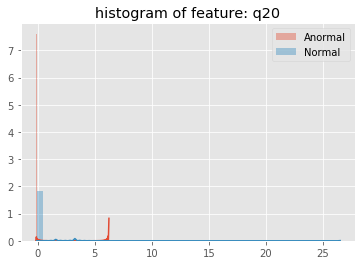

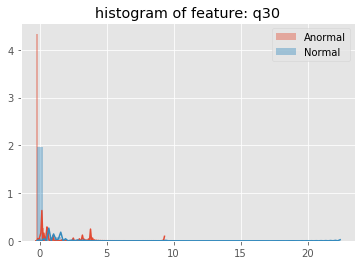

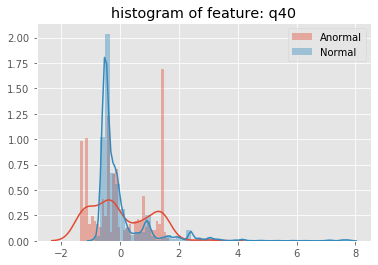

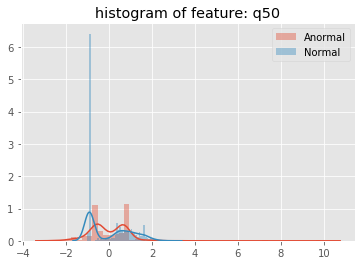

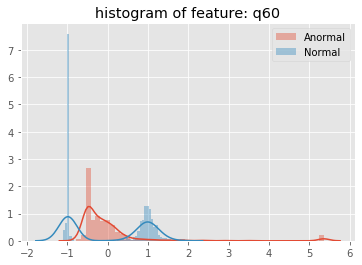

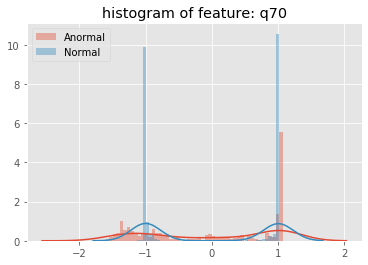

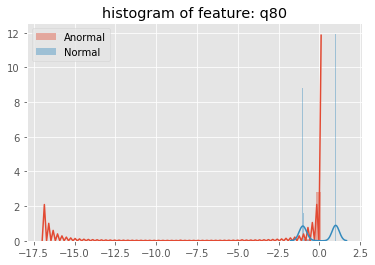

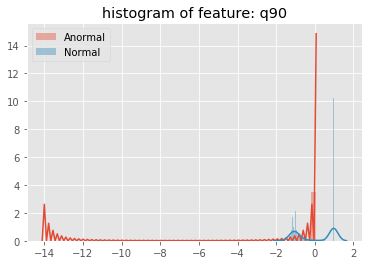

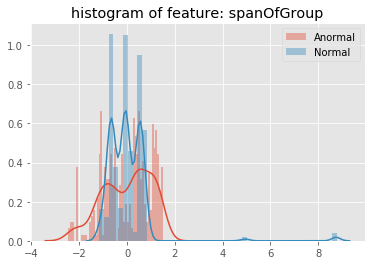

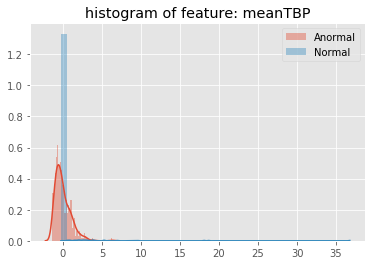

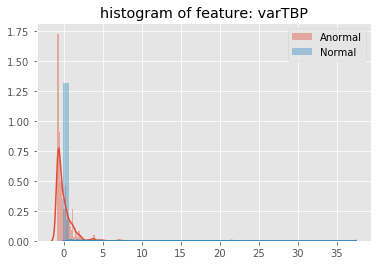

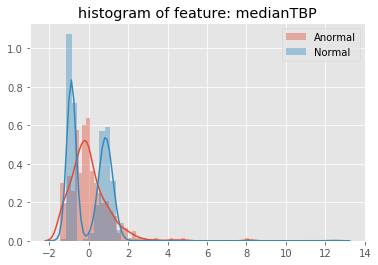

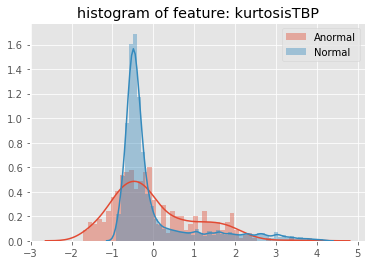

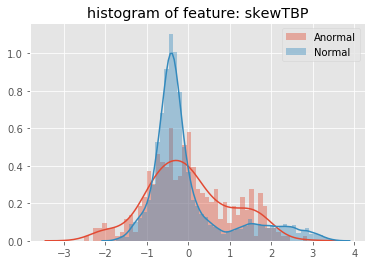

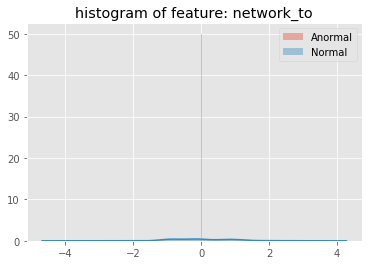

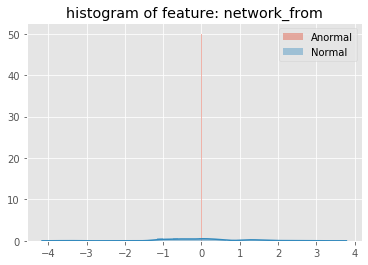

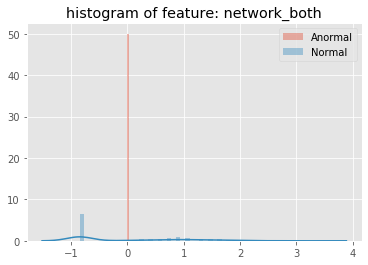

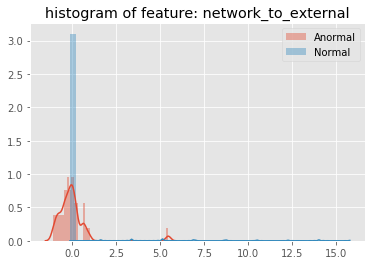

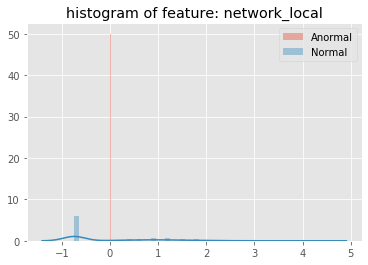

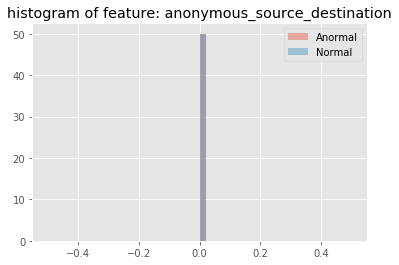

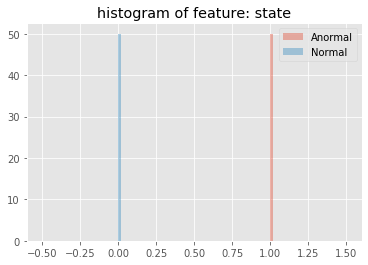

In [37]:
import seaborn as sns 
import matplotlib.gridspec as gridspec
dataset = combined_data
# plt.figure(figsize=(12,28*5))
# gs = gridspec.GridSpec(28, 1)
for feature in columns_data:
    ax = plt.subplot()
    sns.distplot(dataset[feature][dataset.state == 1], bins=50, label='Anormal')
    sns.distplot(dataset[feature][dataset.state == 0], bins=50, label='Normal')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(feature))
    plt.legend(loc='best')
    plt.show()